<a href="https://colab.research.google.com/github/navya04002/Navya-Agarwal/blob/main/Final_python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electric Vehicles🚗**

Tracking the Growth and Distribution of Electric Vehicles Across the US

# **Business Context**

### Client Company: VoltEdge Consulting

It is a Strategic Advisory Firm which works with Automobile Manufacturers, Govermnment Agencies and Energy Providers to increase the adoption of Electric Vehicles.
They have collected a data of registered EVs and want a comprehensive analysis to examine the trends, patterns and and distribution of EVs in few geographical areas. The dataset is intended to be used for Exploratory Data Analysis.

The client has business questions they need answered and they require my data analysis expertise to gain insights from the dataset.

**My Role:** As a data scientist, I have to analyse the dataset and gain valuable insights from the given data and provide recommendation to the counsulting firm.

**Source of the dataset:** [link text]()https://www.kaggle.com/datasets/yashdogra/ev-bhebic-c/data

**Dataset Overview:** The dataset consists of various attributes related to electric vehicle sales, including:

Make: Manufacturer of the EV

Model: Specific model of the vehicle

Model Year: Year the vehicle model was manufactured

Electric Utility: The services provided for EVs

Electric Range: The driving range of the vehicle on a full charge

EV Type: Classification of the vehicle

State and County: Geographic location where the vehicle is registered

Registration Counts: Number of vehicles registered in each region

# **📚Importing Libraries & Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.impute import SimpleImputer
from tabulate import tabulate
import scipy.stats as stats

In [ ]:
df_ev = pd.read_csv('Electric Vehicle Population Data.csv')
print("DataFrame Shape:", df_ev.shape)
df_ev.head()

DataFrame Shape: (232230, 17)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


# **🔍Data Exploration**

In [ ]:
df_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

In [ ]:
df_ev.nunique()

,0
VIN (1-10),13560
County,209
City,786
State,49
Postal Code,950
Model Year,21
Make,46
Model,170
Electric Vehicle Type,2
Clean Alternative Fuel Vehicle (CAFV) Eligibility,3


In [ ]:

df_ev.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


**Inferences:** In data exploration, we see data types, the uniques values each features have and if any missing values present in the dataset.

# **⚙️Data Cleaning & Preprocessing**

In [ ]:
df_ev['Legislative District'].dropna(inplace=True)

In [ ]:
df_ev = df_ev.drop(columns=['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'])

In [ ]:
numeric_imputer = SimpleImputer(strategy='median')

numerical_columns= df_ev.select_dtypes(include=['float64', 'int64']).columns
df_ev[numerical_columns] = numeric_imputer.fit_transform(df_ev[numerical_columns])

In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_columns= df_ev.select_dtypes(include=['object']).columns
df_ev[categorical_columns] = categorical_imputer.fit_transform(df_ev[categorical_columns])

In [ ]:
print(df_ev.isnull().sum())

County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
Electric Utility                                     0
dtype: int64


source of code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

https://scikit-learn.org/stable/modules/impute.html

**Inferences:** Cleaning and preprocessing is the important part in exploratory data analysis.

Removing missing items in the Legislative District, and filling in the missing values in numerical columns with there 'mean' and categorical columns with 'mode'. Drop the columns which are not require for the analysis. And after filling in the missing values, recheck if any columns have any errors.

# **Exploratory Data Analysis**

It helps to see the distribution of the values of particular featutres which are important for analysis.

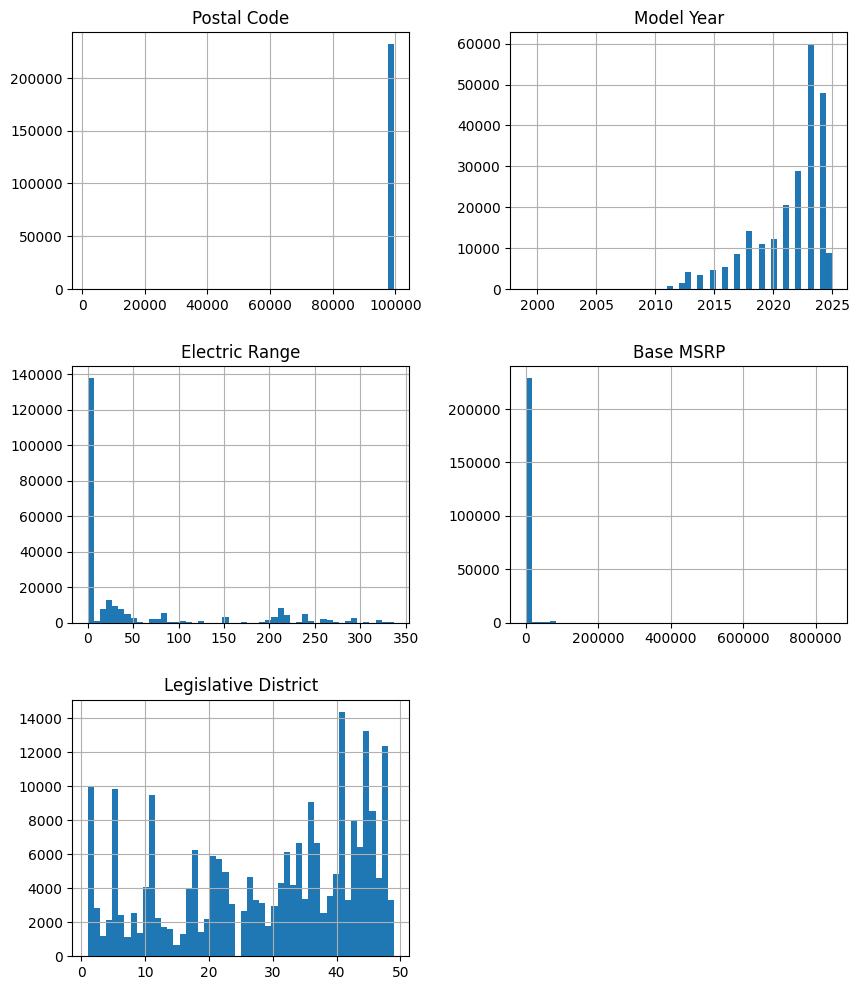

In [ ]:
df_ev.hist(bins=50, figsize=(10,12))
plot.show()

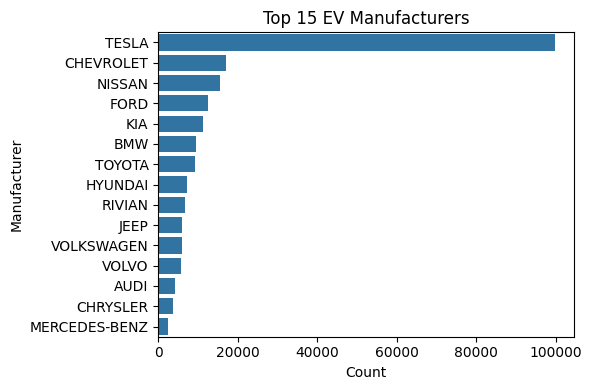

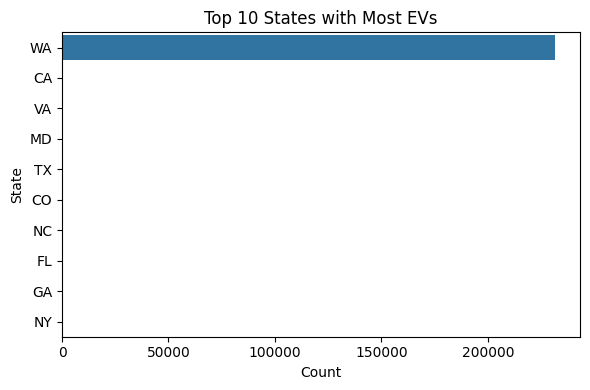

In [ ]:
#plotting for top 15 EV manufacturers:
plot.figure(figsize=(6, 4))
top_makes = df_ev['Make'].value_counts().head(15)
sns.barplot(x=top_makes.values, y=top_makes.index)
plot.title('Top 15 EV Manufacturers', fontsize=12)
plot.xlabel('Count')
plot.ylabel('Manufacturer')
plot.tight_layout()
plot.show()

#Checking for the top 10 states with maximum number of registered EVs:
if df_ev['State'].nunique() > 1:
    plot.figure(figsize=(6, 4))
    top_states = df_ev['State'].value_counts().head(10)
    sns.barplot(x=top_states.values, y=top_states.index)
    plot.title('Top 10 States with Most EVs', fontsize=12)
    plot.xlabel('Count')
    plot.ylabel('State')
    plot.tight_layout()
    plot.show()

source of the code: https://seaborn.pydata.org/generated/seaborn.barplot.html

https://seaborn.pydata.org/generated/seaborn.histplot.html


According to my first analysis, there is a significant regional imbalance in the dataset. Most of the data points come from the Washington state (WA).
This can restrict my ability to extend results to the full US market.

With the increasing model year, the adoption of EV has become much better.
The dataset also include data of 2025, but as its an on-going model year, so we do not have a full data for comparision, thus it shows a significant low value in Model year count.

I tried removing outliers (data points which lie far from the rest of the data) with the Z-score method, but there was no such impact in the final analysis and the key patterns and trends remains the same.

# **Business Questions**

## ***Q1. Is the distribution of electric vehicle range skewed across different vehicle manufacturers and different types of electric vehicles?***

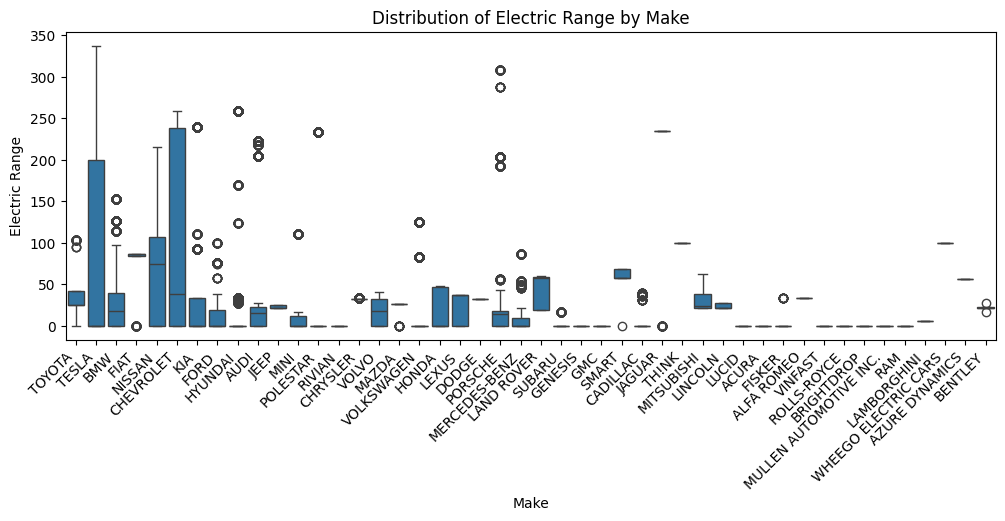

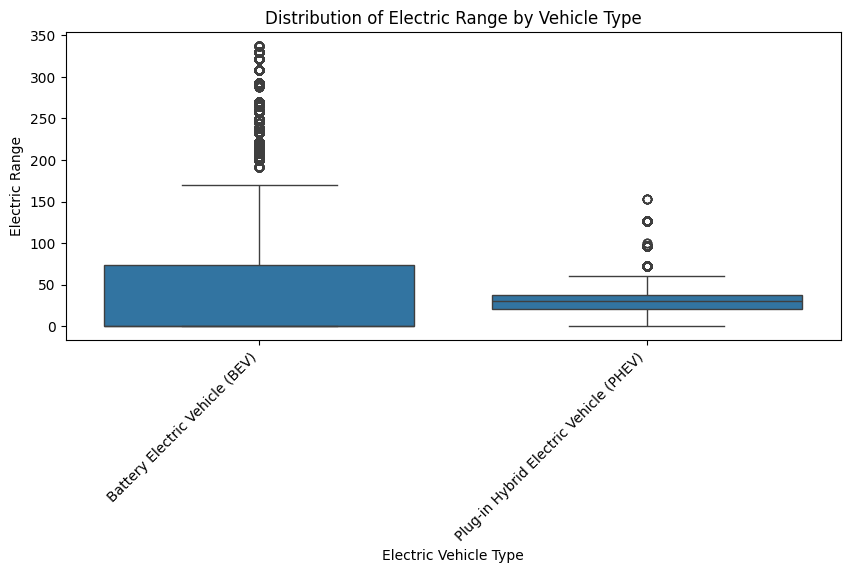

In [ ]:
#Checking for distribution of electric range by manufacturers:
plot.figure(figsize=(12, 4))
sns.boxplot(x='Make', y='Electric Range', data=df_ev)
plot.title('Distribution of Electric Range by Make')
plot.xlabel('Make')
plot.ylabel('Electric Range')
plot.xticks(rotation=45, ha='right')
plot.show()

#Checking for distribution of electric range by with the type of vehicles:
plot.figure(figsize=(10, 4))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df_ev)
plot.title('Distribution of Electric Range by Vehicle Type')
plot.xlabel('Electric Vehicle Type')
plot.ylabel('Electric Range')
plot.xticks(rotation=45, ha='right')
plot.show()

source of code: https://seaborn.pydata.org/generated/seaborn.boxplot.html

**Explanation:**
"The driving range of electric vehicles (EVs) is different based on the vehicle's manufacturer and Electric Vehicle Type. Driving Range is one of the top criterias when a consumer purchases an EV, as it directly impacts the vehicle's practicality and addresses concerns about 'range anxiety'.

The Boxplots created here which reflects the Electric Range w.r.t manufacturers:
- The blue bars represents the Interquartile Range (IQR) which contains more than 50% of the data and outside the box are the outliers.
- It shows that different makers have highly sked electric ranges for the models they have created.
- Helps in product development decision with a specific vehicle category.
- Also helps to predict the range expectations for upcoming models in the specific category.

## ***Q2. Calculate annual growth of electric vehicle adoption using Compounded Annual Growth Rate (CAGR) & year-on-year growth rate based on vehicle model year data. What can we derive from this data?***

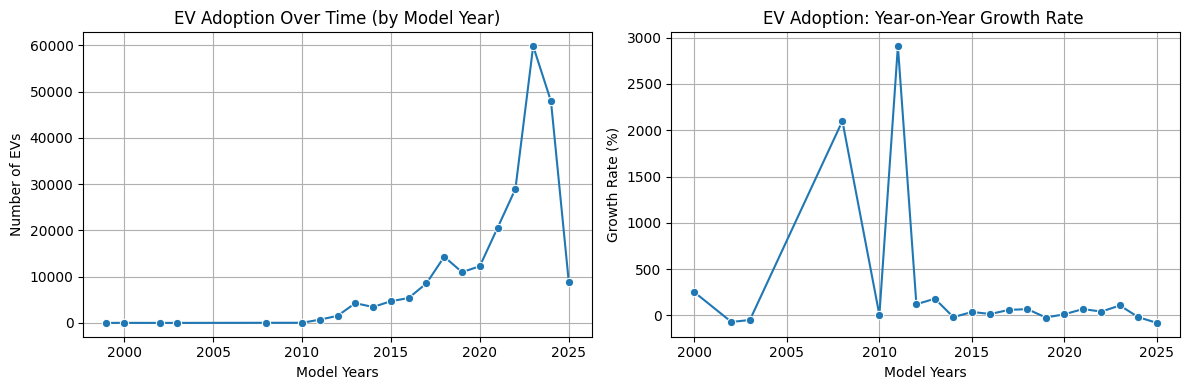

Compounded Annual Growth Rate (CAGR) of EV adoption: 52.21%


In [ ]:
df_ev['Model Year'] = df_ev['Model Year'].astype(int)
ev_counts_in_year = df_ev['Model Year'].value_counts().sort_index(axis=0, ascending=True)

#calculating the value for cagr and cagr percentage:
def calc_cagr(df_ev):
    initial_value = df_ev.iloc[0]
    final_value = df_ev.iloc[-1]
    total_years = len(df_ev) - 1
    cagr = (final_value / initial_value) ** (1 / total_years) - 1
    return cagr

year_on_year_growth = ev_counts_in_year.pct_change() * 100
cagr_percentage = calc_cagr(ev_counts_in_year)

#Plotting for EV-Adoption over moddel years:
plot.figure(figsize=(12, 4))
plot.subplot(1, 2, 1)
sns.lineplot(x=ev_counts_in_year.index, y=ev_counts_in_year.values, marker='o')
plot.title("EV Adoption Over Time (by Model Year)")
plot.xlabel("Model Years")
plot.ylabel("Number of EVs")
plot.grid(True)

#Plotting for EV-Adoption growth rate:
plot.subplot(1, 2, 2)
sns.lineplot(x=year_on_year_growth.index, y=year_on_year_growth.values, marker='o')
plot.title("EV Adoption: Year-on-Year Growth Rate ")
plot.xlabel("Model Years")
plot.ylabel("Growth Rate (%)")
plot.grid(True)
plot.tight_layout()
plot.show()

print(f"Compounded Annual Growth Rate (CAGR) of EV adoption: {cagr_percentage * 100:.2f}%")

source for code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

https://seaborn.pydata.org/generated/seaborn.lineplot.html

**Explanation:**
It is very crucial to understand the EV adoption trends for forcasting the future demand. It is helpful of manufacturers to plan production and investments.

Graph 1- represents the adoption of EVs over a period of time. Till 2010 there was no such adoption of electric vehicles but gradually the number improved after that and reached at peak point in 2023. It is an exponential growth curve.

Graph 2- A a sharp growth from 2003 to 2008, so there is a high jump in growth rate percentage. And after 2011 we can see fluctuations in the growth rate with time. We can see that there is less growth rate from 2019 to 2020 maybe be because of COVID-pandemic.

Year-on-year growth rates does not have a consistent upward or downward trend, and despite too much fluctuation in the growth rate, CAGR is still 52.21% that indicates a scope for better EV adoptions in fututre and figuring out where the EV market is at the moment in the technology adoption lifecycle.

## ***Q3. What is the geographical distribution of EVs? Can we identify regions where we can build charging infrastructure development?***

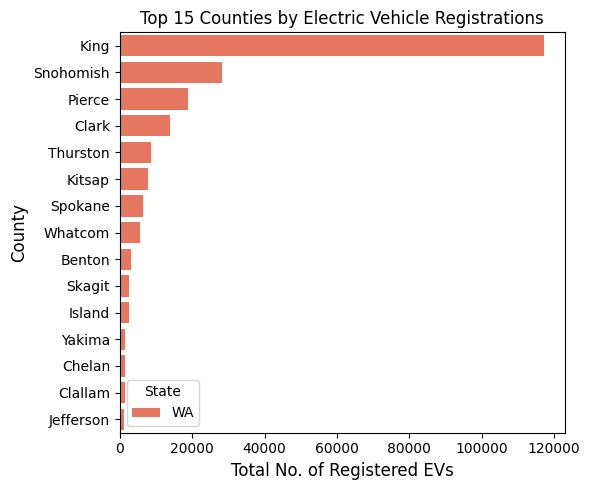

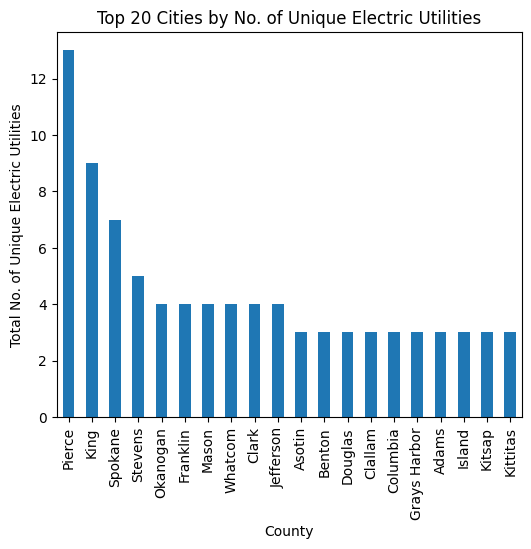

In [ ]:
utility_counts_per_state = df_ev.groupby('State')['Electric Utility'].nunique().sort_values(ascending=False)
utility_counts_per_city = df_ev.groupby('County')['Electric Utility'].nunique().sort_values(ascending=False).head(20)

region_counts = df_ev.groupby(['State', 'County']).size().reset_index(name='Count')
region_counts = region_counts.sort_values('Count', ascending=False)

#Plotting for top 15 counties with the no. of EV registrations:
top_counties = region_counts.head(15)
plot.figure(figsize=(6, 5))
ax = sns.barplot(x='Count', y='County', hue='State', data=top_counties, palette='Reds')
plot.title('Top 15 Counties by Electric Vehicle Registrations', fontsize=12)
plot.xlabel('Total No. of Registered EVs', fontsize=12)
plot.ylabel('County', fontsize=12)
plot.tight_layout()
plot.show()

#Plotting for top 20 cities have numberf of unique electric utilities:
plot.figure(figsize=(6, 5))
utility_counts_per_city.plot(kind='bar')
plot.title('Top 20 Cities by No. of Unique Electric Utilities')
plot.xlabel('County')
plot.ylabel('Total No. of Unique Electric Utilities')
plot.show()


source of the code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/docs/reference/api/pandas.merge.html


**Explanation:**
- As we can see in graph 1, county 'king' has a highest number of registered EVs as compared to other. The uneven distribution in adoption of Electric vehicles is maybe due to factors such as economy or policy differences.

- In Graph-2 we can see that there is huge number of electric utilities in some counties but very few in other.

'King' has the highest number of EVs registered but has very less number of Electric utilities present.

This will helps utility providers to take decisions about where and how many charging infrastructures should be installed to provide services to EV owners.

It will also help EV manufacturing comapnies to increase there sales in the city where no. of EVs regeistered are less but high no. of electric utility.


## ***Q5. What are the most popular EV models and manufacturers, and how do they compare in terms of electric range and performance?***

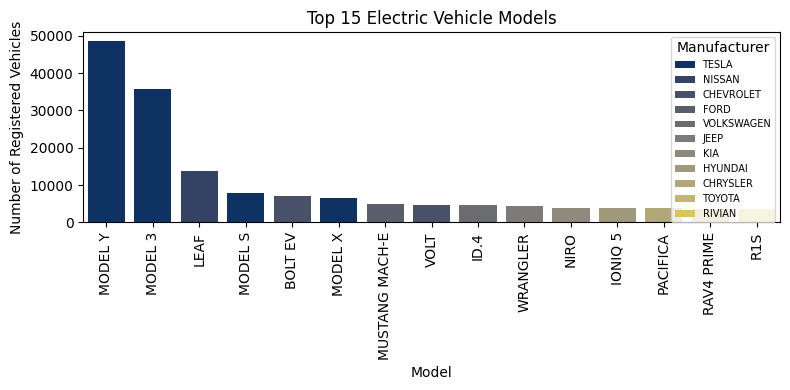

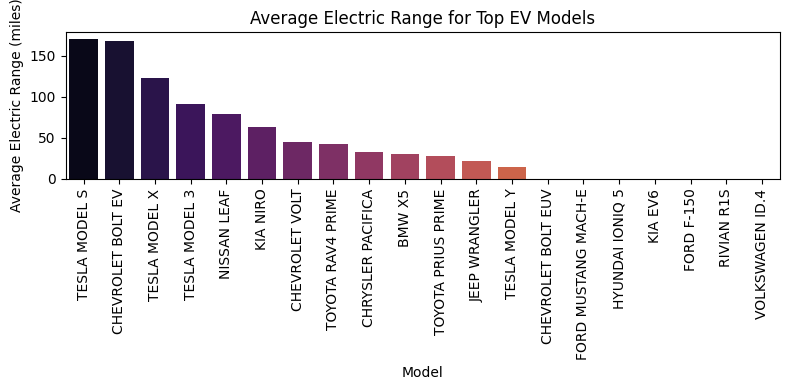

In [ ]:
#Looking for the Top Models of top manufacturers:
model_counts = df_ev.groupby(['Make', 'Model']).size().reset_index(name='Count')
model_counts = model_counts.sort_values('Count', ascending=False)

plot.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Count', hue='Make', data=model_counts.head(15), palette='cividis')
plot.title('Top 15 Electric Vehicle Models', fontsize=12)
plot.xlabel('Model', fontsize=10)
plot.ylabel('Number of Registered Vehicles', fontsize=10)
plot.xticks(rotation=90)
plot.legend(title='Manufacturer', loc='upper right', fontsize=7)
plot.tight_layout()
plot.show()

#Comparing the Top Models with no. of evs registerd for that model:
top_models = model_counts.head(20)
list_of_top_model = [(row['Make'] + ' ' + row['Model']) for _, row in top_models.iterrows()]

df_ev['Make_Model'] = df_ev['Make'] + ' ' + df_ev['Model']

#Calculating the Avg. Range of the Top best models:
model_performance = df_ev[df_ev['Make_Model'].isin(list_of_top_model)].groupby('Make_Model').agg({'Electric Range': ['mean', 'std', 'count']}).reset_index()
model_performance.columns = ['Model', 'Avg_Range', 'Range_StdDev', 'Count']
model_performance = model_performance.sort_values('Avg_Range', ascending=False)

plot.figure(figsize=(8, 4))
ax = sns.barplot(x='Model', y='Avg_Range',hue='Model', data=model_performance, palette='inferno', legend =False)
plot.title('Average Electric Range for Top EV Models', fontsize=12)
plot.xlabel('Model', fontsize=10)
plot.ylabel('Average Electric Range (miles)', fontsize=10)
plot.xticks(rotation=90)
plot.tight_layout()
plot.show()

source of the code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

https://seaborn.pydata.org/generated/seaborn.barplot.html

**Explanation:**

Graph-1 shows the best models of the key manufacturers where Tesla holds the highest market share for 'MODEL Y & MODEL 3' followed by Nissan ('LEAF') which have comparatively less market share.

The comparision on the electric range between models provides an insights on the performamnce of the specific model. Some models provide double the range of other models. Tesla (MODEL S)and Chevrolet Bolt(EV) provide highest average range for EVs representing a premium segment of EV with high retail pricing.


## ***Q6. What is the price premium for additional electric range across different vehicle categories and model years, and how has this "cost per mile of range" metric evolved over time?***

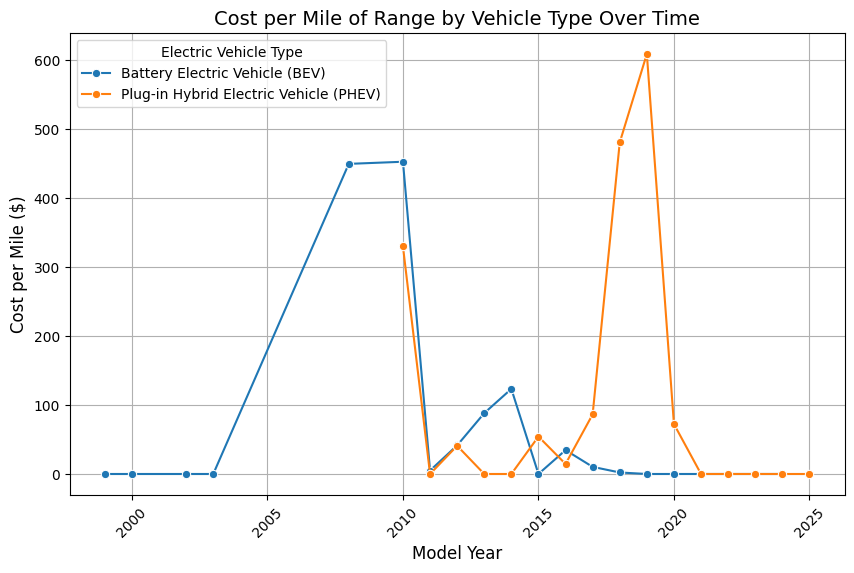

In [ ]:
df_ev['Cost_Per_Mile'] = df_ev['Base MSRP'] / df_ev['Electric Range']

vehicle_type_cost = df_ev.groupby(['Electric Vehicle Type', 'Model Year'])['Cost_Per_Mile'].mean().reset_index()

plot.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Cost_Per_Mile', hue='Electric Vehicle Type', data=vehicle_type_cost, marker='o')
plot.title('Cost per Mile of Range by Vehicle Type Over Time', fontsize=14)
plot.ylabel('Cost per Mile ($)', fontsize=12)
plot.xlabel('Model Year', fontsize=12)
plot.grid(True)
plot.xticks(rotation=45)
plot.show()


Source of the code: https://seaborn.pydata.org/generated/seaborn.lineplot.html

### **Explanation:**
From the above line graph, we can see that the cost per mile has reduced over the time for both the types of EVs, that means manufacturers are trying to improve the efficiency of the vehicles and trying to reduce cost of manufacturing.

The sharp increase in BEVs and PHEVs shows that during those year, there was a high technology advancement going on, thus the production costs were high resulting in high cost per mile for EVs.

This information is highly useful for businesses who wants to set a good pricing strategies by comparing to other manufacturers, and also reduce cost per mile can be beneficial for more sales of the EVs for present Makers of the cars. Businesses can improve range efficiency and can offer competitive prices for there different models.

# **Final Decision & Analysis:**

Strengths: The analysis have nearly solved all the business questions related to all segments such as pricing, manufacturing, sales, regions for developing new charging stations and providing other utilities.

Exploring the dataset was effective and usefull for all the sectors working with the cliet company.

Limitations: The dataset had many missing values and few data entry errors which can affect the accuracy of the answers. Also according to my analysis, 99% of the dataset belongs to only single city of the US i.e Washington, thus it is hard to predict the coverall condition of United States.  

# **Recommendations:**

- If the cost per mile is decreasing over the time, then manufacturing comapnies should focus on reducing the cost of production to remain in the market and create a tough entry for new comers.

- If companies are launching new technology or product line than it should target those cities which have high sales for there EVs.

- Electrci Range should be the top-most priority for any company to remain competitive in the market and should be price sensitive to reach a wider range of customer.

*Submitted By: Navya Agarwal*

*Student Number: GH1035199*